In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("../sneaker_scraper/main_sneakers.db")

In [3]:
before_2001 = pd.read_sql_query("select * from before_2001;", conn)
year_2001 = pd.read_sql_query("select * from year2001;", conn)
year_2002 = pd.read_sql_query("select * from year2002;", conn)
year_2003 = pd.read_sql_query("select * from year2003;", conn)
year_2004 = pd.read_sql_query("select * from year2004;", conn)
year_2005 = pd.read_sql_query("select * from year2005;", conn)
year_2006 = pd.read_sql_query("select * from year2006;", conn)
year_2007 = pd.read_sql_query("select * from year2007;", conn)
year_greater = pd.read_sql_query("select * from year2008_and_09;", conn)

In [4]:
all_years = pd.concat([before_2001, year_2001, year_2002, year_2003, year_2004, year_2005, year_2006, year_2007, year_greater])

In [5]:
# all_years.to_csv('sneakers.csv')

In [6]:
# all_years
all_years = all_years.drop_duplicates(subset="sneaker", keep="first")
all_years = all_years.drop("id", axis=1)
all_years = all_years.astype({'price': 'int32'})
all_years = all_years.astype({'brand': 'str'})

In [7]:
all_years

,sneaker,price,brand,date
0,['Jordan 15 OG Low Black Silver'],300,Jordan,release: 09/06/2000
1,['Jordan 15 OG Low White Red'],300,Jordan,release: 01/01/2000
2,['Jordan 15 OG Low Midnight Navy'],325,Jordan,release: 01/01/2000
3,['Jordan 14 OG Low Ginger'],755,Jordan,release: 09/15/1999
4,['Jordan 14 OG Low Columbia Blue'],399,Jordan,release: 08/04/1999
...,...,...,...,...
2684,['Jordan Trainer ST G White Obsidian'],209,Jordan,release: 11/02/2018
2685,['Jordan Legacy 312 Rookie of the Year'],70,Jordan,release: 11/01/2018
2686,['Jordan 1 Retro Low Utility Pack (W)'],53,Jordan,release: 11/01/2018
2687,['Air Max 90 Ultra Mid Winter Black'],138,Air,release: 11/01/2018


In [8]:
test = all_years.head()

In [9]:
test

,sneaker,price,brand,date
0,['Jordan 15 OG Low Black Silver'],300,Jordan,release: 09/06/2000
1,['Jordan 15 OG Low White Red'],300,Jordan,release: 01/01/2000
2,['Jordan 15 OG Low Midnight Navy'],325,Jordan,release: 01/01/2000
3,['Jordan 14 OG Low Ginger'],755,Jordan,release: 09/15/1999
4,['Jordan 14 OG Low Columbia Blue'],399,Jordan,release: 08/04/1999


In [10]:
ntest = test.iloc[:,3].str[15:]
brand =test.iloc[:,2]
price = test.iloc[:,1]

In [11]:
list_of_tuples = list(zip(ntest, brand, price))
df = pd.DataFrame(list_of_tuples, columns = ['ntest', 'brand', 'price'])  
df  

,ntest,brand,price
0,2000,Jordan,300
1,2000,Jordan,300
2,2000,Jordan,325
3,1999,Jordan,755
4,1999,Jordan,399


In [12]:
price = all_years.iloc[:,1]
brands = all_years.iloc[:,2]
years = all_years.iloc[:,3].str[15:]

In [13]:
shoe_data_by_year = list(zip(brands, price, years))
shoe_df = pd.DataFrame(shoe_data_by_year, columns = ['brand', 'price', 'year'])

In [14]:
shoe_df

,brand,price,year
0,Jordan,300,2000
1,Jordan,300,2000
2,Jordan,325,2000
3,Jordan,755,1999
4,Jordan,399,1999
...,...,...,...
2687,Jordan,209,2018
2688,Jordan,70,2018
2689,Jordan,53,2018
2690,Air,138,2018


In [15]:
avg_by_year = shoe_df.groupby('year').mean()
avg_by_brand = shoe_df.groupby('brand').mean()

In [16]:
avg_by_year

,price
year,
1997,480.000000
1998,350.000000
1999,472.750000
2000,308.333333
2001,414.428571
2002,405.266667
2003,363.360000
2004,415.105263
2005,391.297872


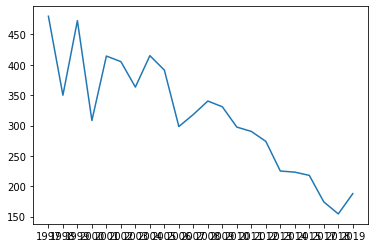

In [17]:
#find highest brand every year
#find most expensive and least expensive in data for every year
#find other things as well
plt.plot(avg_by_year)

In [18]:
# plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
prices = avg_by_year['price'][0:]
year = avg_by_year.index
year
# plt.plot([1, 2, 3, 4], [prices])

Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2017', '2018', '2019'],
      dtype='object', name='year')

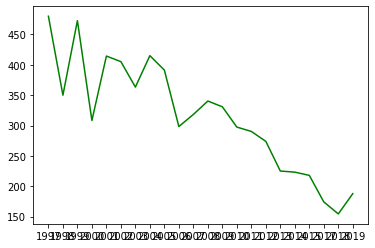

In [24]:
plt.plot(year, prices,'-g')

In [20]:
years = shoe_df.groupby('year')

In [21]:
years.head()

,brand,price,year
0,Jordan,300,2000
1,Jordan,300,2000
2,Jordan,325,2000
3,Jordan,755,1999
4,Jordan,399,1999
...,...,...,...
2259,Air,79,2018
2260,Nike,85,2018
2261,adidas,150,2018
2262,Jordan,55,2018
